<a href="https://colab.research.google.com/github/RampoguAravind2003/Smart-Helmet-for-Coal-mIners/blob/main/sentiment_analysis_of_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import Libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Bidirectional, LSTM
from tensorflow.keras.callbacks import EarlyStopping


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Step 2: Load the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Headway/Desktop/major project/imdb dataset/IMDB Dataset.csv")

# View the first few rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Headway/Desktop/major project/imdb dataset/IMDB Dataset.csv'

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Colab Notebooks/imdb dataset'

In [20]:
import pandas as pd

# Load the dataset, make sure to add the file name!
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb dataset/IMDB Dataset.csv') # Added the filename to the path

# View the first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Step 3: Map Labels to Numerical Values**
The data came with a string format "positive" "negative" but we use a numercial 0 and 1 to train the model on the data

In [21]:
# Since the dataset wans't represented with any numeric values I had to map them to some
# Map sentiment labels to numerical values
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Check the mapping
df[['sentiment', 'label']].head()

,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


# **Step 4: Preprocess the Text Data**

We'll lowercase the text, remove stopwords manually because NLTK was not functioning with Kaggle

In [22]:
# Manually define some common stopwords since NLTK wasnt working
stop_words = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
                  "your", "yours", "yourself", "yourselves", "he", "him", "his",
                  "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                  "they", "them", "their", "theirs", "themselves", "what", "which",
                  "who", "whom", "this", "that", "these", "those", "am", "is", "are",
                  "was", "were", "be", "been", "being", "have", "has", "had", "having",
                  "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
                  "or", "because", "as", "until", "while", "of", "at", "by", "for",
                  "with", "about", "against", "between", "into", "through", "during",
                  "before", "after", "above", "below", "to", "from", "up", "down",
                  "in", "out", "on", "off", "over", "under", "again", "further",
                  "then", "once", "here", "there", "when", "where", "why", "how",
                  "all", "any", "both", "each", "few", "more", "most", "other", "some",
                  "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
                  "very", "s", "t", "can", "will", "just", "don", "should", "now"])

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Keep only letters and spaces
    text = re.sub(r'\d', '', text)   # Remove numbers
    text = text.lower()              # Convert to lowercase
    words = text_to_word_sequence(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'review' column
df['clean_text'] = df['review'].apply(preprocess_text)

# Check the cleaned text
df[['review', 'clean_text']].head()


,review,clean_text
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ll...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


# **Step 5: Preparation and Tokenization**

Establish x and y variables with the new clean data, tokenize the text.


In [23]:
# Prepare the data for the neural network
X = df['clean_text'].values
y = df['label'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Use the top 10000 words
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)



# **Step 6: Padding and Train and Test Splits**
Pad then sequences to ensure the lenght stays consistent for all the input data. Then splits the data for training and testing

In [24]:
# Pad sequences to ensure the same length for all input data
X_padded = pad_sequences(X_tokenized, maxlen=150)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


# **Step 7: Bi-directional LTSM(Long Short-Term Memory) RNN**

Example: In the sentence: “The movie was not great.”

A regular LSTM might focus on “The movie was…” and struggle with “not great.”
A Bi-directional LSTM can understand the whole sentence, considering both “The movie was” and “not great” at the same time.

In [25]:
# Build the neural network model with an embedding layer that learns its own embeddings
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=150))  # Trainable embedding layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Bi-directional LSTM
model.add(Dropout(0.4))  # Reduced dropout
model.add(LSTM(64))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# > **1. Optimizer:**
Purpose: Determines how the model's weights will be updated during training to minimize the loss.
Example: 'adam' is an optimizer that adjusts the learning rate dynamically based on the training data, making it a popular choice for many models.
# > **2. Loss Function:**
Purpose: Defines the metric the model will use to evaluate its performance and guide the training process.
Example: 'binary_crossentropy' is used for binary classification tasks (like distinguishing between two classes: positive and negative). It measures how well the model's predictions match the actual labels.
# > **3. Metrics:**
Purpose: Specifies which metrics to monitor during training and evaluation to gauge the model's performance.
Example: ['accuracy'] means the model will track and display accuracy, showing how often the predictions are correct compared to the actual labels.

# **Step 9: Train and Testing the model**
Early stop ensures that training stops once validation accuracy stops improving and the compile function

In [26]:
# Use EarlyStopping to stop training once validation accuracy stops improving
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 556s 879ms/step - accuracy: 0.7823 - loss: 0.4516 - val_accuracy: 0.8790 - val_loss: 0.2839
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 557s 872ms/step - accuracy: 0.9183 - loss: 0.2235 - val_accuracy: 0.8772 - val_loss: 0.2939
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 873ms/step - accuracy: 0.9461 - loss: 0.1549 - val_accuracy: 0.8751 - val_loss: 0.3097
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 565s 878ms/step - accuracy: 0.9580 - loss: 0.1200 - val_accuracy: 0.8692 - val_loss: 0.3639
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 192ms/step - accuracy: 0.8802 - loss: 0.2814
Test Accuracy: 87.90%


# **Step 10: Evaluate performance**
Here we check the plots to see a visual representation of the data

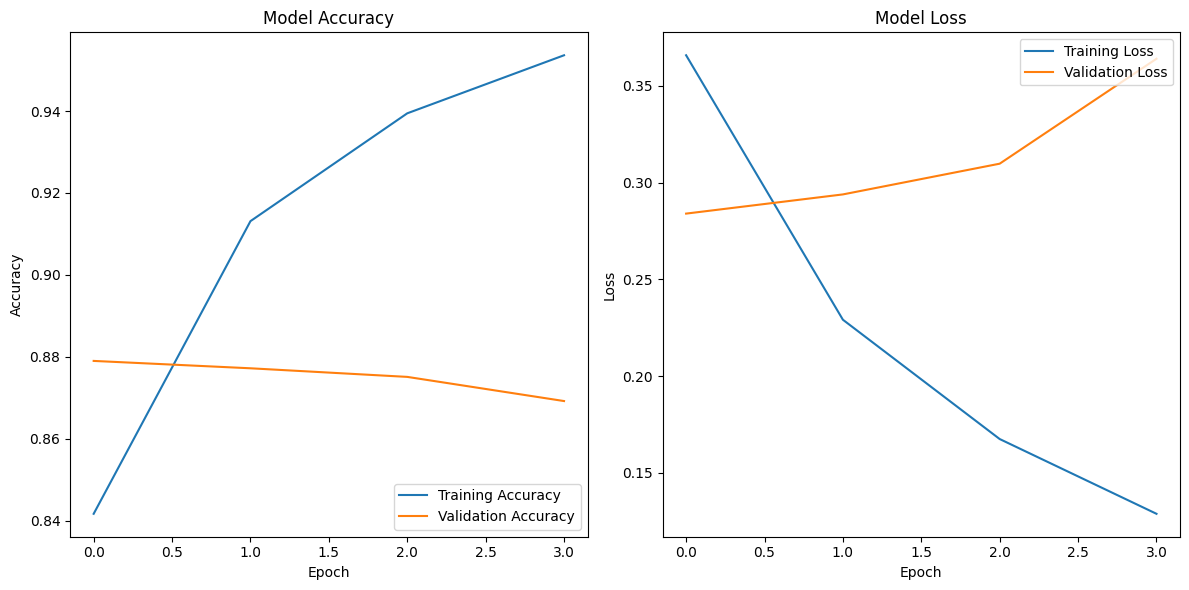

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call this function to visualize the result after training
plot_history(history)


In [28]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have your test data (X_test) and labels (y_test)
# Step 1: Make predictions (this should give you probabilities for each class)
y_pred_probs = model.predict(X_test)

# Step 2: Convert probabilities to binary predictions (0 or 1)
# Threshold at 0.5, meaning if the predicted probability is > 0.5, it's classified as 1, else 0
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Step 3: Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 185ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4961
           1       0.89      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



1. Precision: Meaning: Of all the times the model predicted a class (e.g., 1 for positive sentiment), how many of those predictions were actually correct?
2. Recall: Meaning: Of all the actual positive cases, how many did the model correctly identify?
3. F1 Score: A balance between precision and recall. A higher F1 score means better overall performance.
4. Support: How many examples in the test set belong to each class
5. Accuracy: How often is the model correct overall?
6. Macro Average: The unweighted mean of precision, recall, and F1 scores for all classes.
7. Weighted Average: The weighted mean of precision, recall, and F1 scores, where each class's score is weighted by its support.